<a href="https://colab.research.google.com/github/MK316/Classroom/blob/main/Week07_Ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Week07 (5/21, Tuesday)

## #️⃣ Todo list:
1. Intro (TTS assisted class)
2. Reading chapter: Chapter 5A Human Journey
3. Learning goals: 
* Vocabulary learning with sounds (N, V, Adj, Adv)
* Grammar point: general verbs, that clause, some useful expressions
4. Midterm results and remarks
5. Class activities

---
## 1. Introduction to TTS (Text-to-Speech)
---

In [1]:
# Check current working directory:
%pwd

'/content'

In [2]:
#@markdown 🚩 {gTTS} package installation and import
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

In [6]:
#@markdown 🚩 Making a function { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "ko" #@param ["en", "fr","ko",'es']
  # lang = language_to_choose

  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = False)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

Sample text: Today is Tuesday, May 24th. Hello Kyoungsang National University graduate students! It's an honor to meet you. My name is TTS, and I convert your text to speech. I hope I can assist you in an effective way. Thank you.

In [7]:
#@markdown 🚩 Type text to say
text_to_say = input()

안녕하세요 경상대학교 대학원생 여러분. 만나뵙게 되어 반갑습니다. 저는 티티에스 보조 프로그램입니다. 오늘 수업 시간에 작지만 도움이 되었으면 합니다. 


In [8]:
#@markdown 🚩 Output: Text to Speech (audio)
tts(text_to_say)

Play language accent: ko


---
## 2. Reading chapter: Chapter 5A Human Journey
---

## **Chapter 5. The DNA trail**

Paragraphs: PA, PB, PC, PD, PE, PF, PG, PH, PI, PJ, PK

---

↘️ PA:  
Everybody **loves** a good story, and when it'**s finished**, this **may be** the greatest one ever told.
It **begins** in Africa with a group of people.
**There are** perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts.
It **ends** about 200,000 years later, with their seven billion descendants spread across the Earth.</a>

↘️ PB:  
In between **is** an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history.
Who **were** those first modern people in Africa?
What routes **did** they **take** when they **left** their home continent to expand into Europe and Asia?
When and how **did** humans **reach** the Americas?
For decades, the only proof **was** found in a small number of scattered bones and artifacts that our ancestors **had left** behind.
In the past 20 years, however, DNA technologies **have allowed** scientists to find a record of ancient human migrations in the DNA of living people.   

---
**_Tracing Ancestry in DNA._**

↘️ PC:   
Every drop of human blood **contains** a history book written in the language of our genes," **says** population geneticist Spencer Wells.
The human genetic code, or genome, **is** 99.9 percent identical throughout the world.
The bulk of our DNA **is** the same.
However, the remainder **is** responsible for our individual differences -- in eye color or disease risk, for example.
On very rare occasions, a small change -- called a mutation -- **can occur**.
This can then be passed down to all of that person's descendants.
Generations later, finding that same mutation in two people's DNA **indicates** that they share the same ancestor.
By comparing mutations in many different populations, scientists **can trace** their ancestral connections.

↘️ PD:   
These ancient mutations **are** easiest to tract in two places.
One **is** in DNA that is passed from mother to child (called mitochondrial DNA, or mtDNA).
The other **is** in DNA that travels from father to son (known as the Y chromosome, the part of DNA that **determines** a child **will be** a boy).
By comparing the mtDNA and Y chromosomes of people from various populations, geneticists **can get** a rough idea of where and when those groups **separated** in the great migrations around the planet.  

---
**_Out of Africa_**  

↘️ PE:  
In the mid-1980s, a study **compared** mtDNA from people around the world.
It **found** that people of African descent **had** twice as many genetic differences from each other than did others.
Because mutations **seem to occur** at a steady rate over time, scientists **concluded** that modern humans **must have lived** in Africa at least twice as long as anywhere else.
They now **calculate** that all living humans maternally **descend** from a single woman who **lived** roughly 150,000 years ago in Africa, a "mitochondrial Eve."
If geneticists **are** right, all of humanity **is** linked to Eve through an unbroken chain of mothers.
This Eve **was** soon joined by "Y-chromosome Adam," the possible genetic father of us all, also from Africa.
DNA studies **have confirmed** that all the people on Earth **can trace** their ancestry to ancient Africans.

↘️ PF:  
What **seems** certain **is** that at a remarkably recent date -- probably between 50,000 and 70,000 years ago -- one small group of people, the ancestors of modern humans outside of Africa, **left** Africa for western Asia.
They either **migrated** around the wider northern end of the Red Sea, or across its narrow southern opening.

↘️ PG:  
Once in Asia, genetic evidence **suggests**, the population **split**.
One group **stayed** temporarily in the Middle East, while the other **began** a journey that **would last** tens of thousands of years.
Moving a little farther with each new generation, they **followed** the coast around the Arabian Peninsula, India, and Southeast Asia, all the way to Australia.
"The movement **was** probably imperceptible," **says** Spencer Wells.
"It **was** less of a journey and probably more like walking a little farther down the beach to get away from the crowd."

↘️ PH:  
Archeological evidence of this 13,000-kilometer migration from Africa to Australia **has almost completely vanished**.
However, genetic traces of the group that **made** the trip **do exist**.
They **have been found** in the DNA of indigenous peoples in Malaysia, in Papua New Guinea, and in the DNA of nearly all Australian aborigines.
Modern discoveries of 45,000-year-old bodies in Australia, buried at a site called Lake Mungo, **provide** physical evidence for the theories as well.

↘️ PI:  
People in the rest of Asia and Europe **share** different but equally ancient mtDNA and Y-chromosome mutations.
These mutations **show** that most **are** descendants of the group that **stayed** in the Middle East for thousands of years before moving on.
Perhaps about 40,000 years ago, modern humans first **advanced** into Europe.

---  
**_Peopling the Americas_**

↘️ PJ:  
About the same time as modern humans **pushed** into Europe, some of the same group that **had paused** in the Middle East spread east into Central Asia.
They eventually reached as fas as Siberia, the Korean Peninsula, and Japan.
Here **begins** one of the last chapters in the human story -- the peopling of the Americas.
Most scientists **believe** that today's Native Americans descend from ancient Asians who **crossed** from Siberia to Alaske in the last ice age.
At that time, low sea levels **would have exposed** a land bridge between the continents.
Perhaps they -- only a few hundred people -- **were travelling** along the coast, moving from one piece of land to the next, between a freezing ocean and a wall of ice.
"A coastal route **would have been** the easiest way in," **says** Wells.
"But it still **would have been** a hell of a trip."
Once across, they **followed** the immense herds of animals into the mainland.
They **spread** to the tip of South America in as little as a thousand years.

↘️ PK:  
Genetic researchers **can only tell** us the basic outlines of a story of human migration that **is** more complex than any ever written.
Many details of the movements of our ancestors and their countless individual lives **can only be imagined**.
But thanks to genetic researchers -- themselves descendants of mtDNA Eve and Y-chromosome Adam -- we **have begun** to unlock important secrets about the origins and movements of our ancient ancestors.


# What is this chapter about?
With wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


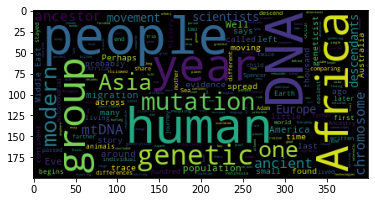

In [11]:
#@markdown Wordcloud

import nltk
import os
nltk.download("punkt")

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#@markdown 🌀 Text file to read (ch.5): filename = RE.ch05.txt

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")

#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

wc = WordCloud().generate(text) 
plt.imshow(wc)

## [1] Vocabulary: getting a wordlist with POS

In [12]:
#@markdown Install packages {corpus-toolkit}
%%capture
!pip install corpus-toolkit

In [13]:
#@markdown 🌀 Import {os} to create a folder in the server:
import os
os.mkdir("txtdata")

#@markdown 🌀 Text file to read (ch.5): filename = RE.ch05.txt

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")

#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

#@markdown 🌀 Move the text file to 'txtdata' folder:

!mv "/content/RE.ch05.txt" "/content/txtdata"

In [14]:
#@markdown 🌀 Tokenize the text
from corpus_toolkit import corpus_tools as ct
txt_corp = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(txt_corp) #tokenize corpus - by default this lemmatizes as well
word_freq = ct.frequency(tok_corp) #creates a frequency dictionary

#@markdown 🌀 Tagged_txt (tagged data folder), txtdata (original data folder)
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

#@markdown 🌀 Create a dataframe and save it as csv file:\
#@markdown => The file contains a tagged wordlist (below better one.)
import pandas as pd

data_dict = tagged_freq
data_items = data_dict. items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
print(df)

df.to_csv(r'/content/tagged.csv', index=False)
df1 = pd.read_csv('tagged.csv')


Processing RE.ch05.txt (1 of 1 files)
Processing RE.ch05.txt (1 of 1 files)
Processing 1.txt (1 of 1 files)
the_DET	64
of_ADP	47
in_ADP	31
a_DET	30
be_AUX	28
and_CCONJ	20
have_AUX	12
from_ADP	12
people_NOUN	11
they_PRON	11
                  0   1
0           the_DET  64
1          dna_NOUN  10
2        trail_NOUN   1
3    everybody_PRON   1
4         love_VERB   1
..              ...  ..
408         we_PRON   1
409     unlock_VERB   1
410   important_ADJ   1
411     secret_NOUN   1
412     origin_NOUN   1

[413 rows x 2 columns]


### Editing and sa ving the wordlist as csv file: Using R

In [15]:
%load_ext rpy2.ipython

In [16]:
#@markdown 🅁 Dataframe modification: output = tagged_wordlist.csv
%%R
df2<-read.csv('tagged.csv')
colnames(df2) <- c('Tagwords','Freq')
colnames(df2)

t1 <- df2$Tagwords
t2<-t1[1]; t2
# t3<-as.vector(strsplit(t2,'_')); t3
t3<-gsub("[a-zA-Z]+_","",t2); t3

df3<-df2
head(df3)
pos = df3$Tagwords
word = df3$Tagwords

POS = gsub("[[:alnum:]|[:punct:]]+_","",pos)
WORD = gsub("_[A-Z]+","",word)
df4<-cbind.data.frame(Tagged=df3$Tagwords, Words = WORD, POS=POS, Freq=df3$Freq)
df4

# Sort by Freq in decreasing order:
df5<-df4[order(df4$Freq, decreasing=T),]; head(df5)
# Add new index: serial numbering
len<-length(df5$Words)
indx<-1:len

df6<-data.frame(ID = indx, df5)

#@markdown 🅁 Tagged_contentwords.csv
df2<-read.csv('tagged.csv')
colnames(df2) <- c('Tagwords','Freq')
colnames(df2)

t1 <- df2$Tagwords
t2<-t1[1]; t2
# t3<-as.vector(strsplit(t2,'_')); t3
t3<-gsub("[a-zA-Z]+_","",t2); t3

df3<-df2
head(df3)
pos = df3$Tagwords
word = df3$Tagwords

POS = gsub("[[:alnum:]|[:punct:]]+_","",pos)
WORD = gsub("_[A-Z]+","",word)
df4<-cbind.data.frame(Tagged=df3$Tagwords, Words = WORD, POS=POS, Freq=df3$Freq)
df4

# Sort by Freq in decreasing order:
df5<-df4[order(df4$Freq, decreasing=T),]; head(df5)
# Add new index: serial numbering
len<-length(df5$Words)
indx<-1:len

df6<-data.frame(ID = indx, df5)

# Save the result file in csv
#write.csv(df6, "tagged_wordlist.csv", row.names=FALSE)
#summary(df6$POS)

#@markdown Trim the file
# df7 = df6[df$POS !== "DET"]
df7 = df6[(df6$POS == "NOUN")|(df6$POS == "ADJ")|(df6$POS == "VERB")|(df6$POS == "ADV"),]
length(df7$POS)
#unique(df7$POS)
df7[1] = 1: length(df7$POS)
df8 = df7[-2]
head(df8)
write.csv(df8, "tagged_contentwords.csv", row.names=FALSE)

In [17]:
#@markdown 🅁 Output file = Tagged_contentwords.csv
%%R
df2<-read.csv('tagged.csv')
colnames(df2) <- c('Tagwords','Freq')
colnames(df2)

t1 <- df2$Tagwords
t2<-t1[1]; t2
# t3<-as.vector(strsplit(t2,'_')); t3
t3<-gsub("[a-zA-Z]+_","",t2); t3

df3<-df2
head(df3)
pos = df3$Tagwords
word = df3$Tagwords

POS = gsub("[[:alnum:]|[:punct:]]+_","",pos)
WORD = gsub("_[A-Z]+","",word)
df4<-cbind.data.frame(Tagged=df3$Tagwords, Words = WORD, POS=POS, Freq=df3$Freq)
df4

# Sort by Freq in decreasing order:
df5<-df4[order(df4$Freq, decreasing=T),]; head(df5)
# Add new index: serial numbering
len<-length(df5$Words)
indx<-1:len

df6<-data.frame(ID = indx, df5)

# Save the result file in csv
#write.csv(df6, "tagged_wordlist.csv", row.names=FALSE)

summary(df6$POS)

#@markdown Trim the file
# df7 = df6[df$POS !== "DET"]
df7 = df6[(df6$POS == "NOUN")|(df6$POS == "ADJ")|(df6$POS == "VERB")|(df6$POS == "ADV"),]
length(df7$POS)
#unique(df7$POS)
df7[1] = 1: length(df7$POS)
df8 = df7[-2]
head(df8)
write.csv(df8, "tagged_contentwords.csv", row.names=FALSE)

### 📗 Check out the result file

In [18]:
#@markdown Read the result file ('tagged_contentwords.csv)
df = pd.read_csv('tagged_contentwords.csv')
df.head()

,ID,Words,POS,Freq
0,1,people,NOUN,11
1,2,dna,NOUN,10
2,3,year,NOUN,8
3,4,group,NOUN,7
4,5,genetic,ADJ,7


In [41]:
#@markdown Wordlist by POS and Freq; Save it as 'Ch05_POS.csv'
df1 = df.sort_values(by=['POS','Freq'], ascending=False)

df1['ID'] = range(1, len(df1['ID'])+1)
df1
df1.to_csv('Ch05_POS.csv',index=False)

###📗 Nouns to learn: select words by POS (e.g., POS = "NOUN")

In [43]:
#@markdown 🌀 Wordist by POS for reading:

POS ="VERB" #@param ["NOUN", "ADJ","VERB",'ADV']

selected = df1.loc[df1['POS'] == POS]; selected
# print(selected['Words'])
list1 = selected['Words']

wordlist = list(list1)
print('%s words: '%POS, len(wordlist))

wordlist1 = ', '.join(wordlist)
wordlist1

VERB words:  69


'can, find, begin, live, would, spread, occur, leave, trace, say, call, compare, move, tell, reach, write, pass, share, travel, seem, descend, stay, follow, love, finish, may, survive, hunt, gather, end, record, take, expand, scatter, allow, contain, indicate, tract, know, determine, will, separate, conclude, must, calculate, link, join, confirm, migrate, suggest, split, last, walk, vanish, make, exist, bury, provide, show, advance, people, push, pause, believe, cross, expose, freeze, imagine, unlock'

In [44]:
text_to_say = wordlist1

In [45]:
#@markdown 🚩 Making a function { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
  # lang = language_to_choose
  speed = "True" #@param ["False", "True']
  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = speed)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

In [46]:
#@markdown 🔈 Audio generated: 
tts(wordlist1)

Play language accent: en


📍 Correction in the Verb list: 'record (Noun)' vs. 'record (Verb) # ("https://www.dictionary.com/browse/record")'

## [2] Sentence reading

In [47]:
#@markdown 📗 Read text:

file = open('/content/txtdata/RE.ch05.txt')
text = file.read()
file.close()

In [48]:
#@markdown 📗 Import {re} and split text into sentences:
import re
sents = text.split('\n')
type(sents); print('Number of sentences: ', len(sents))

Number of sentences:  74


In [51]:
#@markdown ♥️ TTS(👩) will read a sentence for me 😍: type sentence number
print('Type sentence number: (e.g., 1~74')
sent_number = input()
sn = int(sent_number)
text_to_say = sents[sn-1]
print('Sentence to read (%d): '%sn, sents[sn-1])
tts(text_to_say)

Type sentence number: (e.g., 1~74
3
Sentence to read (3):  It begins in Africa with a group of people.
Play language accent: en


In [ ]:
#@markdown 🔎  Search for sentence with the first three words
search_sent = input()


result = re.findall(search_sent+'.+',text)
result_sent = ''.join(result)
print(result_sent)
tts(result_sent)


Genetic researchers can
Genetic researchers can only tell us the basic outlines of a story of human migration that is more complex than any ever written.
Play language accent: en


## [3] Paragraph reading

In [52]:
import numpy as np

In [53]:
#@markdown 📗 Text by paragraph (combining sentences)

paragraph = "PA" #@param = ["PA", "PB", "PC", "PD", "PE", "PF", "PG", "PH", "PI", "PJ", "PK"]

#@markdown 📗 Text to Speech:
print('Paragraph to read: %s'%paragraph)

PA = '. '.join(sents[0:6])
PB = '. '.join(sents[6:13])
PC = '. '.join(sents[13:24])
PD = '. '.join(sents[24:29])
PE = '. '.join(sents[29:39])
PF = '. '.join(sents[39:42])
PG = '. '.join(sents[42:48])
PH = '. '.join(sents[48:58])
PI = '. '.join(sents[58:69])
PJ = '. '.join(sents[69:3])
PK = '. '.join(sents[70:73])

plist = {'PA': PA, 'PB': PB, 'PC': PC, 'PD': PD, 'PE': PE, 'PF': PF, 'PG': PG, 'PH': PH, 'PI': PI, 'PJ': PJ, 'PK': PK}

text_to_say = plist.get(paragraph)
print('%s: '%paragraph, text_to_say)
tts(text_to_say)

Paragraph to read: PA
PA:  The DNA trail. Everybody loves a good story, and when it's finished, this may be the greatest one ever told.. It begins in Africa with a group of people.. There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts.. It ends about 200,000 years later, with their seven billion descendants spread across the Earth.. 
Play language accent: en


# [3] Grammar in use: 
A. General verb with main meaning \
(cf. be + N/A/P, can/may/will + be )

B. Passives: be + p.p \

In [54]:
#@markdown Collocation: install packages and tokenize text:
%%capture
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

import pandas as pd
import numpy as np

file = open('/content/txtdata/RE.ch05.txt')
text = file.read()
file.close()

from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

words = retokenize.tokenize(text)


In [55]:
#@markdown 🚩 Collocation: finding words in context:

print("Write a word to show its concordeance")
item1 = input()
nltk.Text(words).concordance(item1, 150, 10)

Write a word to show its concordeance
nuts
Displaying 1 of 1 matches:
hundred surviving by hunting animals and gathering fruits vegetables and nuts It ends about 200 000 years later with their seven billion descendants s


---
## Sentence structure with tree diagram

http://mshang.ca/syntree/

**Exampes**

* GV: [문장이란? [^주어부 Everybody][^동사구 [V loves] [^명사구 a story]]

* be: [문장이란? [^주어부 It][^동사구 [V is] [^명사구 something]]

* can be: [문장이란? [^주어부 It][^동사구 [V can be] [^명사구 something]]
---
**Passives**
* be + p.p

1. be-verb + N/A/PP: 
e.g., The movement was probably imperceptible...
[S [^NP The movement] [^VP [be-Verb was] [Adv (probably)] [A imperceptible]]


2. can/may/will + be + N/A/PP

---
**Ch.5 sentences**

[1] Everybody loves a good story, and when it's finished, this may be the greatest one ever told.\

[2] It begins in Africa with a group of people.

[3] There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegegables, and nuts.

[4] It ends about 200,000 years later, with their seven billion descendants spread across the Earth.

* [^S [Subj It] [VP ends] [^PP about 200,000 years later, ] \
* [^PP with their seven billion descendants] \
* [^PP spread across the Earth.]


In [56]:
#@markdown 📗 Text by paragraph (combining sentences)

paragraph = "PB" #@param = ["PA", "PB", "PC", "PD", "PE", "PF", "PG", "PH", "PI", "PJ", "PK"]

#@markdown 📗 Text to Speech:
print('Paragraph to read: %s'%paragraph)

PA = '. '.join(sents[0:6])
PB = '. '.join(sents[6:13])
PC = '. '.join(sents[13:24])
PD = '. '.join(sents[24:29])
PE = '. '.join(sents[29:39])
PF = '. '.join(sents[39:42])
PG = '. '.join(sents[42:48])
PH = '. '.join(sents[48:58])
PI = '. '.join(sents[58:69])
PJ = '. '.join(sents[69:3])
PK = '. '.join(sents[70:73])

plist = {'PA': PA, 'PB': PB, 'PC': PC, 'PD': PD, 'PE': PE, 'PF': PF, 'PG': PG, 'PH': PH, 'PI': PI, 'PJ': PJ, 'PK': PK}

text_to_say = plist.get(paragraph)
print('%s: '%paragraph, text_to_say)
tts(text_to_say)

Paragraph to read: PB
PB:  In between is an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history.. Who were those first modern people in Africa?. What routes did they take when they left their home continent to expand into Europe and Asia?. When and how did humans reach the Americas?. For decades, the only proof was found in a small number of scattered bones and artifacts that our ancestors had left behind.. In the past 20 years, however, DNA technologies have allowed scientists to find a record of ancient human migrations in the DNA of living people.. 
Play language accent: en


In [63]:
#@markdown 🔎  Search for sentence with matching words
search_sent = input()


result = re.findall(search_sent+'.+',text)
result_sent = ''.join(result)
print(result_sent)
tts(result_sent)

Genetic researchers
Genetic researchers can only tell us the basic outlines of a story of human migration that is more complex than any ever written.
Play language accent: en


# 🌛 Bed time story reading {gTTS}🌛

Online library: https://read.gov/aesop/001.html \
🆗  [Goto a separate github link]("https://raw.githubusercontent.com/MK316/applications/main/Bedtimestory_reading_TTS.ipynb")

In [ ]:
#@markdown 🍎  Copy and paste the story:
text_to_say = input()
tts(text_to_say)

The Plane Tree... Two Travellers, walking in the noonday sun, sought the shade of a widespreading tree to rest. As they lay looking up among the pleasant leaves, they saw that it was a Plane Tree.  "How useless is the Plane!" said one of them. "It bears no fruit whatever, and only serves to litter the ground with leaves."  "Ungrateful creatures!" said a voice from the Plane Tree. "You lie here in my cooling shade, and yet you say I am useless! Thus ungratefully, O Jupiter, do men receive their blessings!"  Our best blessings are often the least appreciated.
Play language accent: en
